<a href="https://colab.research.google.com/github/TharinsaMudalige/Neuron-Brain_Tumor_Detection_Classification_with_XAI/blob/Image-Preprocesing/Grp_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import Libraries
import tensorflow as tf

In [ ]:
# Define dataset Directory
dataset_path = '/content/gdrive/MyDrive/Datasets'

# Load dataset and split them into Training and Validation
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
      dataset_path,
      validation_split=0.2, #20% for Validation
      subset="training",
      seed=123, # Seed for reproducibility
)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,  #same split ratio as above
    subset="validation",
    seed=123, #same seed uses here also
)

# Have to create another split as "Testing"...







Found 9904 files belonging to 2 classes.
Using 7924 files for training.
Found 9904 files belonging to 2 classes.
Using 1980 files for validation.


In [ ]:
# Define the Batch-size, Resize images and print Image Labels
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    batch_size=32,# It determines the no of samples processed before the model updates
    image_size=(224,224), # Resized images for a standarized size
)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    batch_size=32, # If training crashes or memory runs out, Reduce to 16 or even 8.
    image_size=(224,224),
)

# Printing the Image Labels
class_names = train_dataset.class_names
print(class_names)



# Printing the number of batches in each set
print("Number of batches in the training set:", len(train_dataset))
print("Number of batches in the validation set:", len(val_dataset))

Found 9904 files belonging to 2 classes.
Found 9904 files belonging to 2 classes.
['Tumour_Positive', 'tumour_Negative']
Number of batches in the training set: 310
Number of batches in the validation set: 310


In [ ]:
# Performance Optimization
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)


In [ ]:
import os

# Specifing my dataset directory
dataset_dir = '/content/gdrive/MyDrive/Datasets'

# List all files in the directory
file_list = os.listdir(dataset_dir)
print("Files in dataset directory:")
print(file_list)

# List contents of each subdirectory
for sub_dir in ['Tumour_Positive', 'tumour_Negative']:
    sub_dir_path = os.path.join(dataset_dir, sub_dir)
    files = os.listdir(sub_dir_path)
    print(f"Files in {sub_dir}:")
    print(files)

    # Traversing through all subdirectories
for root, dirs, files in os.walk(dataset_dir):
    print(f"Directory: {root}")
    for file in files:
        if file.endswith('.nii'):  # Check for .nii files
            print(f"  File: {file}")


Files in dataset directory:
['Tumour_Positive', 'tumour_Negative']
Files in Tumour_Positive:
['meningioma', 'Glioma', 'pituitary']
Files in tumour_Negative:
['healthy']
Directory: /content/gdrive/MyDrive/Datasets
Directory: /content/gdrive/MyDrive/Datasets/Tumour_Positive
Directory: /content/gdrive/MyDrive/Datasets/Tumour_Positive/meningioma
Directory: /content/gdrive/MyDrive/Datasets/Tumour_Positive/Glioma
Directory: /content/gdrive/MyDrive/Datasets/Tumour_Positive/Glioma/_NORMAL T2
Directory: /content/gdrive/MyDrive/Datasets/Tumour_Positive/Glioma/Schwannoma T1
Directory: /content/gdrive/MyDrive/Datasets/Tumour_Positive/Glioma/Papiloma T2
Directory: /content/gdrive/MyDrive/Datasets/Tumour_Positive/Glioma/Tuberculoma T1
Directory: /content/gdrive/MyDrive/Datasets/Tumour_Positive/Glioma/Papiloma T1C+
Directory: /content/gdrive/MyDrive/Datasets/Tumour_Positive/Glioma/Schwannoma T1C+
Directory: /content/gdrive/MyDrive/Datasets/Tumour_Positive/Glioma/Schwannoma T2
Directory: /content/gdri

Processing: /content/drive/MyDrive/Datasets/Tumour_Positive/meningioma/0637.jpg


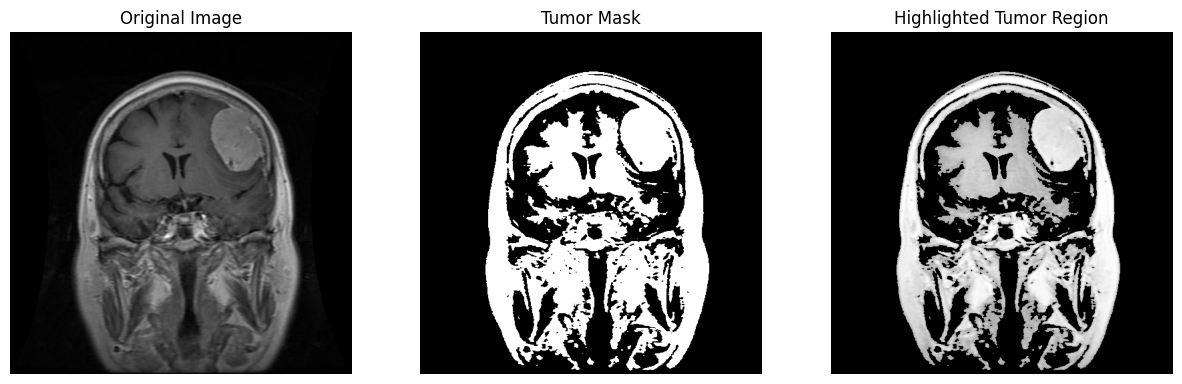

Processing: /content/drive/MyDrive/Datasets/Tumour_Positive/meningioma/0636.jpg


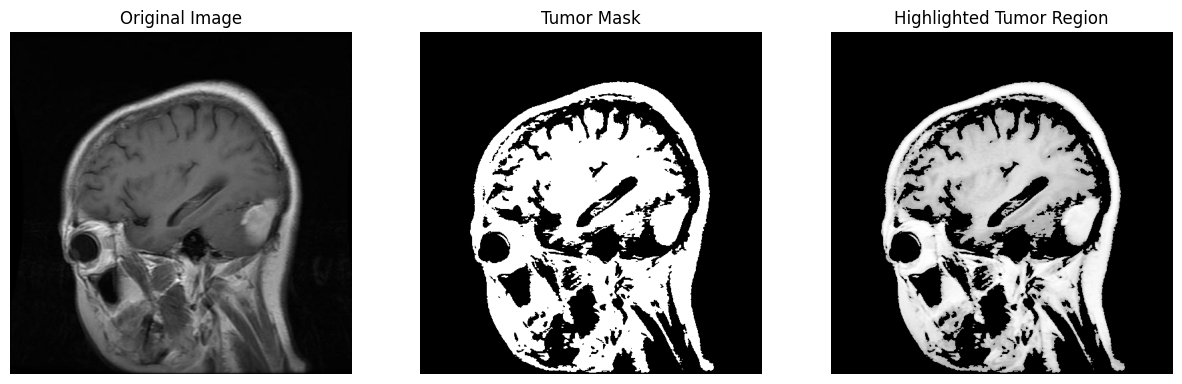

Processing: /content/drive/MyDrive/Datasets/Tumour_Positive/meningioma/0643.jpg


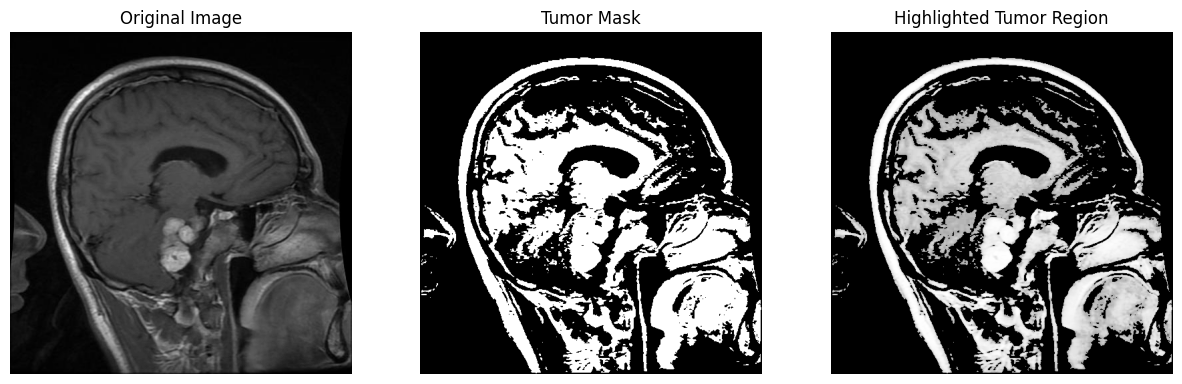

Processing: /content/drive/MyDrive/Datasets/Tumour_Positive/meningioma/0664.jpg


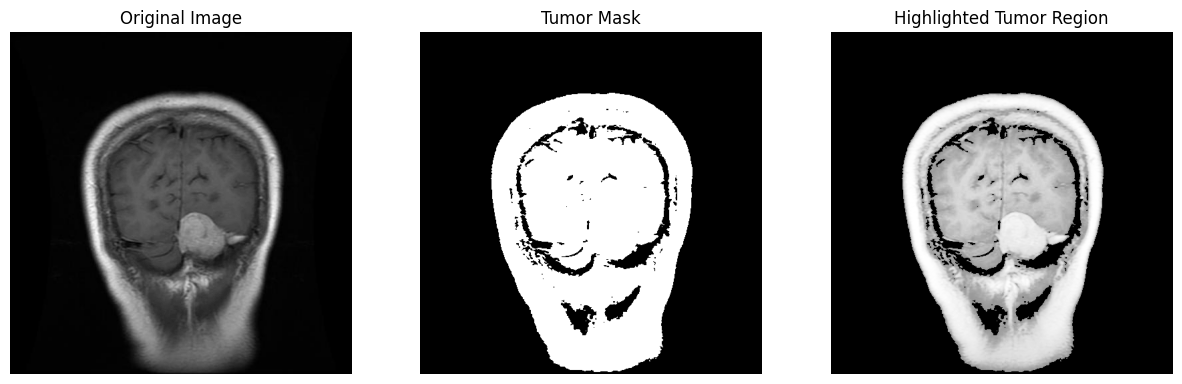

Processing: /content/drive/MyDrive/Datasets/Tumour_Positive/meningioma/0653.jpg


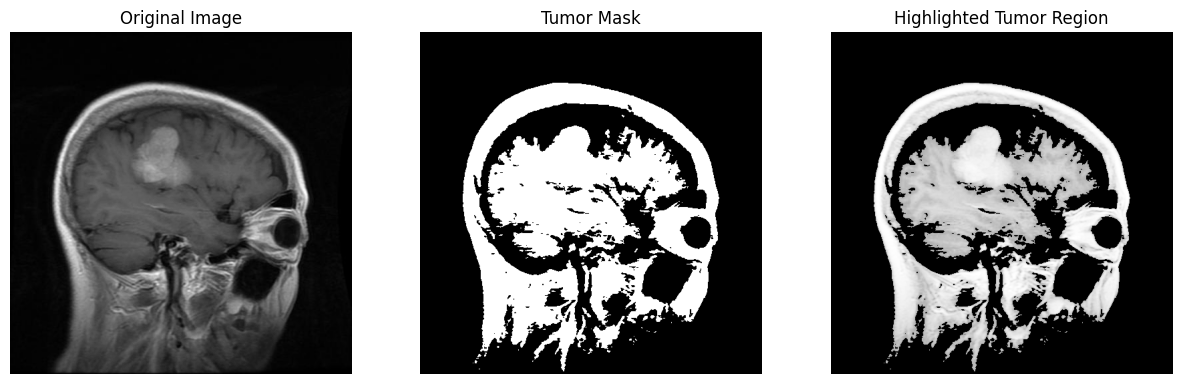

Processed 5 images. Stopping.


In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def tumor_highlight_segmentation(image_path, output_path, k=3):
    # Read the image in grayscale
    image = cv2.imread(image_path, 0)

    # Apply histogram equalization for contrast enhancement
    enhanced_image = cv2.equalizeHist(image)

    # Reshape for K-Means
    pixel_values = enhanced_image.reshape((-1, 1)).astype(np.float32)

    # Apply K-Means Clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Reshape labels back to the original image shape
    segmented_image = labels.reshape(image.shape)

    # Identify the cluster with the highest intensity (likely tumor)
    tumor_cluster = np.argmax(centers)

    # Create a binary mask for the tumor region
    tumor_mask = (segmented_image == tumor_cluster).astype(np.uint8)

    # Highlight the tumor region in the original image
    highlighted_image = cv2.bitwise_and(enhanced_image, enhanced_image, mask=tumor_mask)

    # Save the highlighted image
    cv2.imwrite(output_path, highlighted_image)

    # Visualize results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Tumor Mask")
    plt.imshow(tumor_mask, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Highlighted Tumor Region")
    plt.imshow(highlighted_image, cmap='gray')
    plt.axis('off')

    plt.show()

def process_images_in_folder(folder_path, k=3, max_images=5):
    image_count = 0

    # Use os.walk to traverse through all subdirectories
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Check if the file is an image
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif')):
                input_path = os.path.join(root, file)

                # Output path for the highlighted image
                output_path = os.path.join(root, f"highlighted_{file}")

                print(f"Processing: {input_path}")

                # Perform tumor highlighting
                try:
                    tumor_highlight_segmentation(input_path, output_path, k=k)
                    image_count += 1
                except Exception as e:
                    print(f"Error processing {input_path}: {e}")

                # Stop after processing the specified number of images
                if image_count >= max_images:
                    print(f"Processed {image_count} images. Stopping.")
                    return
    if image_count == 0:
        print("No images found to process.")

# Provide the folder path and call the function
process_images_in_folder('/content/drive/MyDrive/Datasets', k=3, max_images=5)








In [ ]:
for root, dirs, files in os.walk(output_dir):
    print(f"Directory: {root}")
    for file in files:
        print(f"  File: {file}")


Directory: /content/gdrive/MyDrive/Processed_Datasets


In [ ]:
# Data Normalization
normalization_layer = tf.keras.layers.Rescaling(1./255) # Normalized Value = (Scale*Pixel)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# The .map() function is used to apply the normalization to every single image in the dataset.
# x: Represents the image data.
# y: Represents the label (class of the image), Eg:0 for "tumour_Negative" and 1 for "tumour_Positive")


# Veryfying whether Normalization is applied correctly,
for images, labels in train_dataset.take(1):
    print("Pixel Values:", images.numpy().min(), images.numpy().max())







Pixel Values: 0.0 1.0


In [ ]:
# Optimize Dataset for Performance

# Shuffle and Prefetch the Dataset
train_dataset = train_dataset.shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)
               # Shuffling: Randomizeing the order of data to prevent patterns that might bias the model.


# Prefetch the Validation Dataset
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
               # Prefetching: Allows the system to prepare the next batch while the current batch is being processed.

In [ ]:
# Data Augmentation

from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom


# Making the Augmentation Layer
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),   # Can changed according to the requirement         # Randomly flip images horizontal.
    RandomRotation(0.1),        # Can changed according to the requirement         # Randomly rotates images by 10%
    RandomZoom(0.1),            # Can changed according to the requirement         # Randomly zoom images
])

# Applying the augmentation to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))










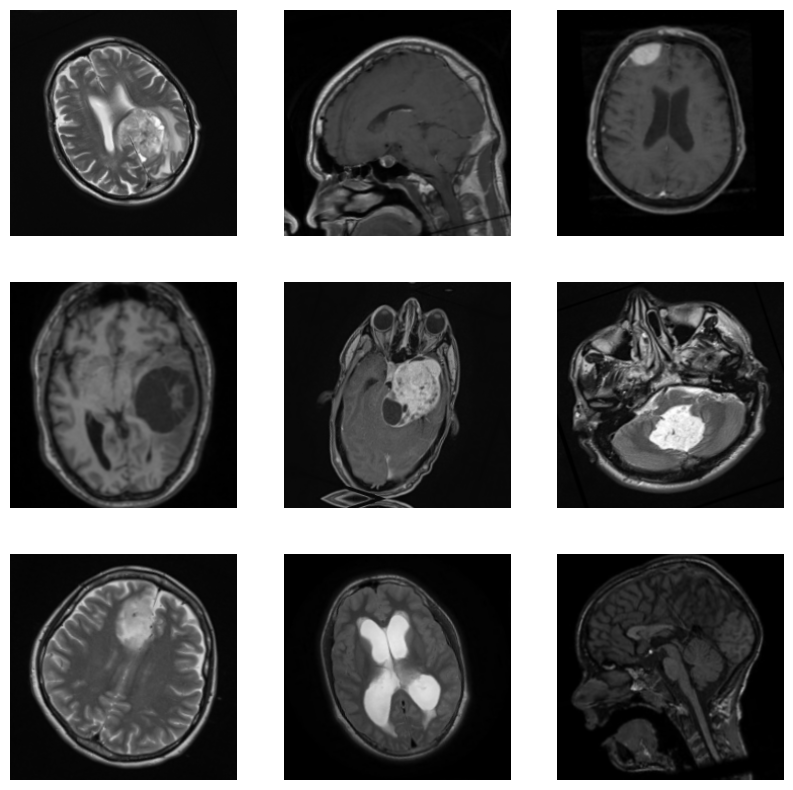

In [ ]:
# Visualization

import matplotlib.pyplot as plt

for images, _ in train_dataset.take(1):  # Take one batch
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Displaying only 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')  # Squeeze for single channel
        plt.axis("off")
    plt.show()